In [1]:
#Ucitavamo X i y iz dokumenta data analysis

In [2]:
%store -r X
%store -r y

In [3]:
from matplotlib import pyplot as plt
import numpy as np

In [4]:
from sklearn.decomposition import PCA

In [5]:
from sklearn.feature_selection import RFECV

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
#podela na trening i test skup

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [10]:
%store X_train

Stored 'X_train' (DataFrame)


In [11]:
%store y_train

Stored 'y_train' (Series)


In [12]:
%store X_test

Stored 'X_test' (DataFrame)


In [13]:
%store y_test

Stored 'y_test' (Series)


In [14]:
train_sets = {"basic" : X_train}
test_sets = {"basic" : X_test}

In [15]:
featureScalings = {}
featureScalings["X_train"] = X_train

In [16]:
#skaliranje i normalizacija

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [18]:
#normalizacija

In [19]:
normalScaler = MinMaxScaler()

In [20]:
normalScaler.fit(X_train)

MinMaxScaler()

In [21]:
import pandas as pd

In [22]:
X_train_normalized = pd.DataFrame(normalScaler.transform(X_train))
%store X_train_normalized
featureScalings["X_train_normalized"] = X_train_normalized
X_train_normalized

Stored 'X_train_normalized' (DataFrame)


,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.078065,0.115454,0.299570,0.378126,0.433603,0.470811,0.812102,0.812049,0.812325,0.640865,...,0.060929,0.000814,0.050659,0.055225,0.376119,0.431667,0.459883,0.520513,0.523077,0.519481
1,0.077293,0.097211,0.250156,0.382547,0.356171,0.460778,0.649332,0.649715,0.651916,0.531860,...,0.171259,0.000741,0.012551,0.031952,0.388060,0.445000,0.471624,0.523077,0.525641,0.519481
2,0.078455,0.114075,0.305201,0.378777,0.446003,0.463820,0.716096,0.716059,0.716155,0.713292,...,0.098368,0.001976,0.224004,0.060267,0.374627,0.430000,0.455969,0.582051,0.584615,0.579221
3,0.078658,0.123300,0.317785,0.365659,0.495200,0.512219,0.550247,0.549941,0.549621,0.571299,...,0.038312,0.000678,0.009321,0.056513,0.338806,0.388333,0.405088,0.735897,0.738462,0.740260
4,0.079567,0.120436,0.238513,0.432829,0.330249,0.484182,0.693709,0.693504,0.696129,0.587430,...,0.130720,0.001662,0.018767,0.044343,0.386567,0.443333,0.485323,0.551282,0.551282,0.550649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40945,0.078895,0.115639,0.299616,0.379435,0.448535,0.456941,0.119109,0.118882,0.119440,0.051147,...,0.040323,0.001936,0.290798,0.495194,0.461194,0.526667,0.569472,0.538462,0.538462,0.535065
40946,0.078332,0.115424,0.305109,0.372894,0.446733,0.457447,0.756107,0.756043,0.756129,0.560534,...,0.062881,0.001222,0.087138,0.472231,0.404478,0.463333,0.495108,0.553846,0.556410,0.548052
40947,0.078992,0.114790,0.304319,0.378437,0.451059,0.463544,0.975099,0.975094,0.975128,0.966550,...,0.027879,0.001739,0.050427,0.045981,0.397015,0.455000,0.485323,0.543590,0.546154,0.540260
40948,0.078814,0.114095,0.310055,0.386342,0.417124,0.545786,0.775144,0.775119,0.775006,0.713245,...,0.052619,0.000776,0.018020,0.193400,0.394030,0.451667,0.479452,0.582051,0.582051,0.568831


In [23]:
X_test_normalized = pd.DataFrame(normalScaler.transform(X_test))
%store X_test_normalized
X_test_normalized

Stored 'X_test_normalized' (DataFrame)


,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.078081,0.106618,0.332966,0.336305,0.442413,0.522272,0.819137,0.819311,0.818319,0.704040,...,0.012860,0.001601,0.058747,0.072105,0.400000,0.458333,0.485323,0.517949,0.523077,0.516883
1,0.077599,0.109130,0.315307,0.347491,0.466061,0.464012,0.813483,0.813591,0.813268,0.718783,...,0.031387,0.001342,0.108001,0.034460,0.353731,0.406667,0.432485,0.528205,0.530769,0.527273
2,0.079781,0.139674,0.248802,0.415466,0.517321,0.439843,0.915107,0.914452,0.916608,0.921204,...,0.018795,0.001469,0.008580,0.048997,0.323881,0.373333,0.393346,0.643590,0.646154,0.659740
3,0.078977,0.115043,0.304786,0.385560,0.449954,0.462256,0.907379,0.907355,0.907395,0.977651,...,0.048916,0.001504,0.061003,0.122016,0.459701,0.525000,0.567515,0.641026,0.643590,0.638961
4,0.078779,0.114438,0.286990,0.381821,0.473339,0.457612,0.735163,0.735125,0.735901,0.785050,...,0.313143,0.001020,0.200748,0.040050,0.401493,0.458333,0.493151,0.507692,0.510256,0.503896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17545,0.082707,0.104735,0.340371,0.378749,0.394603,0.424829,0.699128,0.699328,0.698101,0.826742,...,0.031963,0.001290,0.024647,0.111263,0.265672,0.306667,0.307241,0.543590,0.546154,0.529870
17546,0.077230,0.112273,0.293314,0.376447,0.441966,0.469526,0.278526,0.278446,0.279156,0.084303,...,0.134225,0.000994,0.027340,0.057697,0.358209,0.411667,0.430528,0.751282,0.753846,0.750649
17547,0.077243,0.119580,0.320421,0.385731,0.496936,0.486619,0.547732,0.547520,0.547106,0.578681,...,0.069187,0.000704,0.059920,0.058694,0.413433,0.471667,0.502935,0.510256,0.512821,0.506494
17548,0.080464,0.110603,0.305413,0.355827,0.524992,0.566308,0.757473,0.757535,0.757605,0.512026,...,0.025852,0.001158,0.013244,0.033287,0.422388,0.481667,0.516634,0.461538,0.464103,0.454545


In [24]:
#skaliranje

In [25]:
standardScaler = StandardScaler()

In [26]:
standardScaler.fit(X_train)

StandardScaler()

In [27]:
X_train_standardized = pd.DataFrame(standardScaler.transform(X_train))
%store X_train_standardized
featureScalings["X_train_standardized"] = X_train_standardized
X_train_standardized

Stored 'X_train_standardized' (DataFrame)


,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,-0.039936,0.024477,-0.158786,-0.092004,-0.348028,0.108263,0.799835,0.799833,0.800706,0.163997,...,-0.039281,-0.064567,0.274247,-0.362182,0.162357,0.168705,0.168449,-0.595932,-0.588820,-0.589568
1,-0.200569,-1.970416,-1.799918,0.126157,-2.088645,-0.096266,-0.090351,-0.087826,-0.076609,-0.392878,...,1.966267,-0.075902,-0.430045,-0.722622,0.381746,0.387638,0.334333,-0.563441,-0.556326,-0.589568
2,0.041244,-0.126320,0.028250,-0.059879,-0.069275,-0.034248,0.274783,0.274952,0.274729,0.534004,...,0.641279,0.115155,3.477913,-0.284091,0.134933,0.141338,0.113154,0.183846,0.191034,0.155150
3,0.083435,0.882340,0.446186,-0.707290,1.036639,0.952479,-0.632242,-0.633401,-0.636086,-0.191393,...,-0.450406,-0.085612,-0.489745,-0.342229,-0.523234,-0.542830,-0.605679,2.133291,2.140670,2.162650
4,0.272607,0.569217,-2.186615,2.607684,-2.671351,0.380880,0.152345,0.151619,0.165203,-0.108989,...,1.229371,0.066521,-0.315166,-0.530723,0.354322,0.360272,0.527865,-0.206043,-0.231387,-0.201020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40945,0.132792,0.044687,-0.157251,-0.027439,-0.012360,-0.174492,-2.990128,-2.990477,-2.988855,-2.848703,...,-0.413838,0.108987,4.712355,6.451909,1.725504,1.728608,1.716705,-0.368497,-0.393857,-0.395294
40946,0.015736,0.021138,0.025197,-0.350231,-0.052864,-0.164182,0.493602,0.493588,0.493357,-0.246390,...,-0.003788,-0.001546,0.948420,6.096269,0.683406,0.688672,0.666102,-0.173552,-0.166399,-0.233399
40947,0.152988,-0.048194,-0.001047,-0.076699,0.044378,-0.039892,1.691261,1.691379,1.691119,1.827827,...,-0.640042,0.078545,0.269960,-0.505342,0.546288,0.551839,0.527865,-0.303515,-0.296375,-0.330536
40948,0.116025,-0.124227,0.189440,0.313428,-0.718469,1.636821,0.597712,0.597895,0.596603,0.533764,...,-0.190340,-0.070416,-0.328969,1.777825,0.491440,0.497105,0.444923,0.183846,0.158540,0.025634


In [28]:
X_test_standardized = pd.DataFrame(standardScaler.transform(X_test))
%store X_test_standardized
X_test_standardized

Stored 'X_test_standardized' (DataFrame)


,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,-0.036469,-0.941837,0.950384,-2.155978,-0.149976,1.157418,0.838309,0.839545,0.833492,0.486739,...,-0.913054,0.057152,0.423709,-0.100750,0.601135,0.606572,0.527865,-0.628423,-0.588820,-0.621947
1,-0.136953,-0.667063,0.363878,-1.603957,0.381608,-0.030340,0.807387,0.808264,0.805868,0.562059,...,-0.576287,0.017043,1.334010,-0.683776,-0.248998,-0.241796,-0.218615,-0.498460,-0.491338,-0.492431
2,0.317068,2.672937,-1.844879,1.750779,1.533897,-0.523088,1.363169,1.359785,1.371057,1.596167,...,-0.805181,0.036810,-0.503447,-0.458645,-0.797471,-0.789131,-0.771564,0.963624,0.970889,1.158900
3,0.149786,-0.020506,0.014457,0.274877,0.019536,-0.066144,1.320904,1.320979,1.320669,1.884539,...,-0.257644,0.042091,0.465403,0.672258,1.698081,1.701241,1.689057,0.931133,0.938395,0.899868
4,0.108661,-0.086669,-0.576595,0.090312,0.545208,-0.160819,0.379057,0.379203,0.382725,0.900599,...,4.545404,-0.032684,3.048107,-0.597205,0.628559,0.606572,0.638455,-0.758386,-0.751290,-0.783842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17545,0.926057,-1.147698,1.196328,-0.061269,-1.224720,-0.829177,0.181982,0.183463,0.175989,1.113591,...,-0.565814,0.009001,-0.206508,0.505709,-1.866993,-1.883800,-1.988050,-0.303515,-0.296375,-0.460052
17546,-0.213751,-0.323419,-0.366537,-0.174903,-0.160035,0.082068,-2.118282,-2.117964,-2.115330,-2.679320,...,1.293082,-0.036673,-0.156727,-0.323903,-0.166727,-0.159696,-0.246263,2.328235,2.335634,2.292166
17547,-0.210927,0.475579,0.533727,0.283320,1.075651,0.430563,-0.646001,-0.646638,-0.649843,-0.153681,...,0.110833,-0.081524,0.445396,-0.308460,0.847948,0.825506,0.776692,-0.725895,-0.718796,-0.751463
17548,0.459203,-0.506074,0.035276,-1.192548,1.706337,2.055207,0.501072,0.501745,0.501430,-0.494207,...,-0.676901,-0.011334,-0.417242,-0.701949,1.012490,0.989706,0.970224,-1.343219,-1.336181,-1.399044


In [29]:
#PCA

In [30]:
#PCA with standardized data

In [31]:
pca_standardized = PCA(n_components=48)

In [32]:
pca_standardized.fit(X_train_standardized)

PCA(n_components=48)

In [33]:
pca_standardized.explained_variance_ratio_

array([2.01055472e-01, 1.37450219e-01, 8.78674893e-02, 8.00637246e-02,
       5.96128292e-02, 4.25263010e-02, 4.01092766e-02, 3.36456823e-02,
       3.23391898e-02, 3.06477033e-02, 2.85817348e-02, 2.61388164e-02,
       2.41493074e-02, 1.97588929e-02, 1.78586991e-02, 1.72564621e-02,
       1.67554122e-02, 1.60909115e-02, 1.52849819e-02, 1.34788837e-02,
       1.02636328e-02, 9.84195010e-03, 8.97719166e-03, 8.78401307e-03,
       6.31937138e-03, 5.70250208e-03, 3.81482357e-03, 3.40870743e-03,
       1.18151492e-03, 7.58780650e-04, 9.06820925e-05, 7.99692344e-05,
       6.83386186e-05, 1.78879910e-05, 9.90324183e-06, 3.84130629e-06,
       2.82015076e-06, 1.86304155e-06, 1.29484689e-07, 8.14041330e-08,
       3.11473810e-09, 2.90592882e-09, 1.77470115e-10, 1.69243184e-10,
       6.21386370e-12, 5.99557630e-12, 5.44192181e-12, 4.96116874e-12])

In [34]:
coveredVariance = 0
optimalNumOfComponents = 48

x1 = []
y1 = []
x2 = []
y2 = []

for numOfComponents in range(1, 49):
    coveredVarianceByComponent = pca_standardized.explained_variance_ratio_[numOfComponents-1] * 100
    coveredVariance += coveredVarianceByComponent
    x1.append(f'pca{numOfComponents-1}')
    x2.append(f'{numOfComponents}')
    y1.append(coveredVarianceByComponent)
    y2.append(coveredVariance)
    print(coveredVariance, '        ', coveredVarianceByComponent)
    if coveredVariance > 99:
        optimalNumOfComponents = numOfComponents
        break
        
x1 = np.array(x1)
x2 = np.array(x2)
y1 = np.array(y1)
y2 = np.array(y2)  

20.10554721266461          20.10554721266461
33.85056909921386          13.745021886549246
42.637318025471984          8.786748926258129
50.64369049034683          8.006372464874847
56.604973412223          5.96128292187618
60.857603513770606          4.252630101547602
64.86853117384581          4.01092766007521
68.23309940784674          3.3645682340009273
71.46701838744718          3.23391897960044
74.53178872014577          3.0647703326985876
77.38996220189924          2.8581734817534747
80.00384384561285          2.6138816437136088
82.41877458543694          2.414930739824087
84.39466387761175          1.97588929217481
86.18053378745675          1.785869909845006
87.906180001453          1.7256462139962458
89.58172122403366          1.675541222580668
91.19081237266474          1.6090911486310873
92.71931056699793          1.5284981943332014
94.06719894004922          1.3478883730512838
95.09356221829394          1.0263632782447145
96.07775722794528          0.984195009651347
96.975

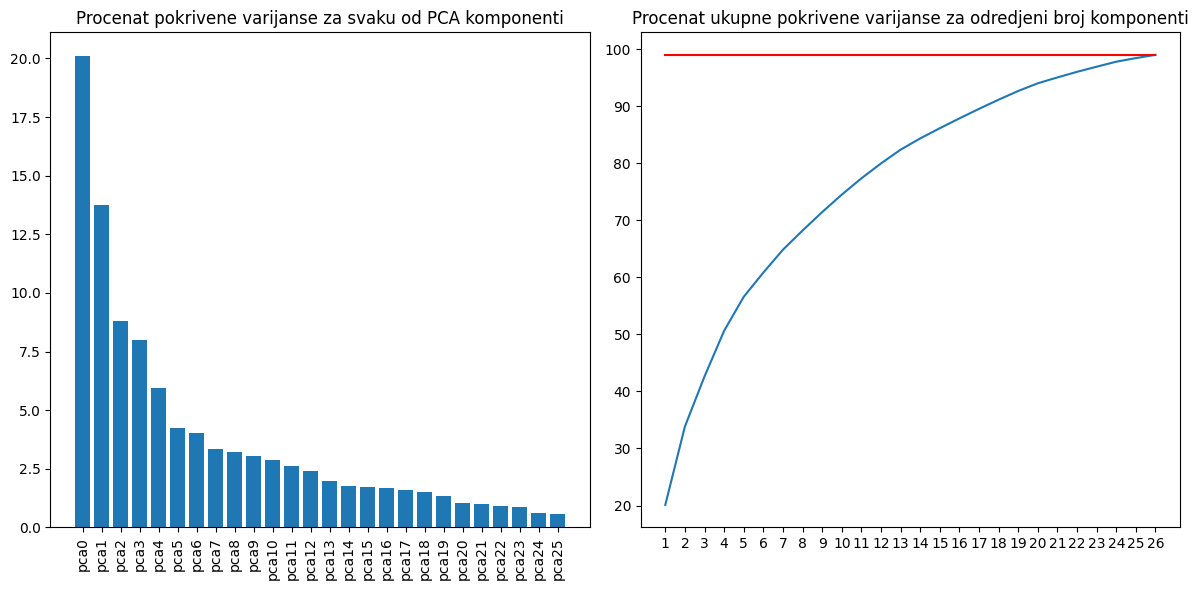

In [35]:
fig = plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.bar(x1, y1)

plt.title('Procenat pokrivene varijanse za svaku od PCA komponenti')

plt.rcParams["figure.figsize"] = (12,6)
plt.xticks(rotation=90)


plt.subplot(1, 2, 2)
plt.plot(x2, y2)
plt.plot(x2, np.array([99 for i in range(len(y2))]), color='red')

plt.title('Procenat ukupne pokrivene varijanse za odredjeni broj komponenti')
plt.tight_layout()

plt.show()

In [36]:
#normalized

In [37]:
pca_normalized = PCA(n_components=48)

In [38]:
pca_normalized.fit(X_train_normalized)

PCA(n_components=48)

In [39]:
pca_normalized.explained_variance_ratio_

array([5.13738569e-01, 2.57386450e-01, 7.62163998e-02, 4.71113958e-02,
       2.57495439e-02, 2.32168194e-02, 1.25043039e-02, 7.77693579e-03,
       5.62259726e-03, 5.43042313e-03, 3.57208898e-03, 3.41546292e-03,
       3.16000608e-03, 3.02294019e-03, 2.86675001e-03, 2.45784997e-03,
       1.60499189e-03, 1.48080207e-03, 8.87543348e-04, 8.37189180e-04,
       6.70956618e-04, 4.37509216e-04, 3.90370659e-04, 1.39860951e-04,
       7.78420795e-05, 5.05501679e-05, 4.52410238e-05, 3.44577273e-05,
       2.77721684e-05, 1.89139218e-05, 1.68351291e-05, 8.93960905e-06,
       7.20121538e-06, 6.07491182e-06, 4.91665690e-06, 1.43069588e-06,
       1.37273296e-06, 5.54766374e-07, 7.46113607e-08, 3.84851245e-08,
       1.18865961e-08, 1.10848835e-08, 6.76955434e-10, 6.45649610e-10,
       1.42280088e-11, 1.37090467e-11, 1.08611897e-11, 9.90180136e-12])

In [40]:
coveredVariance = 0
optimalNumOfComponents = 48

x1 = []
y1 = []
x2 = []
y2 = []

for numOfComponents in range(1, 49):
    coveredVarianceByComponent = pca_normalized.explained_variance_ratio_[numOfComponents-1] * 100
    coveredVariance += coveredVarianceByComponent
    x1.append(f'pca{numOfComponents-1}')
    x2.append(f'{numOfComponents}')
    y1.append(coveredVarianceByComponent)
    y2.append(coveredVariance)
    print(coveredVariance, '        ', coveredVarianceByComponent)
    if coveredVariance > 99:
        optimalNumOfComponents = numOfComponents
        break
        
x1 = np.array(x1)
x2 = np.array(x2)
y1 = np.array(y1)
y2 = np.array(y2)    

51.373856919642215          51.373856919642215
77.1125018711957          25.73864495155349
84.73414185119276          7.6216399799970524
89.44528142633827          4.7111395751455065
92.02023581830466          2.5749543919663886
94.34191776067122          2.321681942366564
95.59234814941314          1.2504303887419121
96.37004172796543          0.7776935785522868
96.93230145409223          0.5622597261267901
97.47534376734065          0.5430423132484146
97.83255266549183          0.35720889815118617
98.17409895788677          0.3415462923949426
98.4900995655782          0.31600060769143595
98.7923935847366          0.3022940191583906
99.07906858526832          0.286675000531712


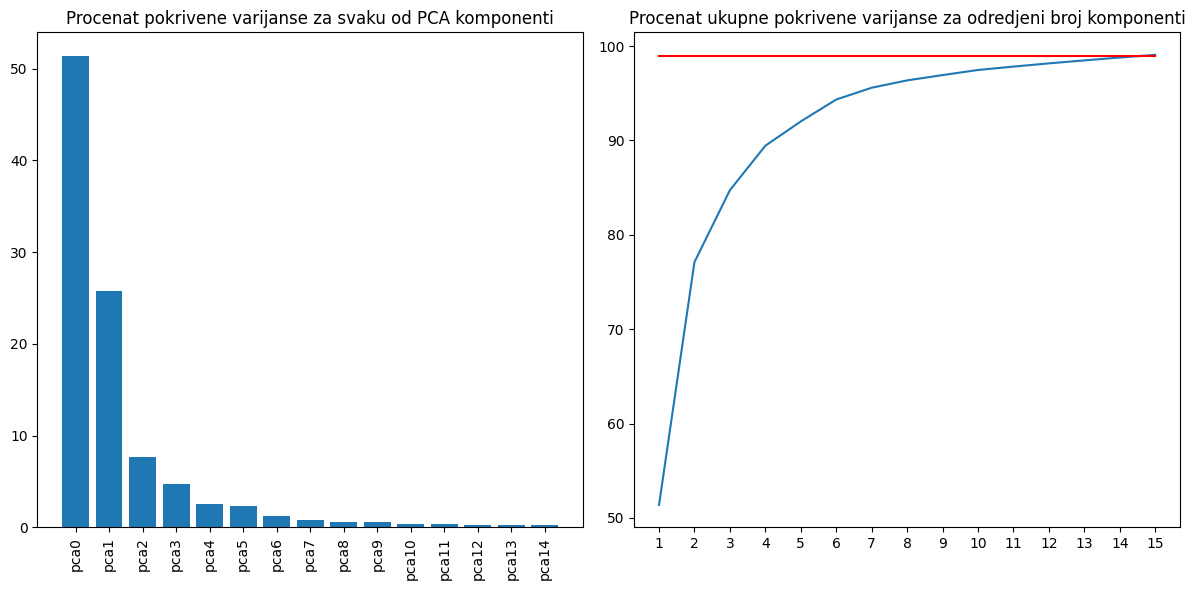

In [41]:
fig = plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.bar(x1, y1)

plt.title('Procenat pokrivene varijanse za svaku od PCA komponenti')

plt.rcParams["figure.figsize"] = (12,6)
plt.xticks(rotation=90)


plt.subplot(1, 2, 2)
plt.plot(x2, y2)
plt.plot(x2, np.array([99 for i in range(len(y2))]), color='red')

plt.title('Procenat ukupne pokrivene varijanse za odredjeni broj komponenti')

plt.tight_layout()
plt.show()

In [42]:
#Ovde vidimo zanimljivo ponasanje: PCA koji bi trebalo da se najbolje ponasa nad standardizovanim podacima najgore
#radi sa njima - ovo je iz razloga sto svi nasi atributi mere istu stvar(istu meru) a s obzirom da atribut 0 ima
#vrednosti oko 10^-6 a atribut 48 vrednosti oko 10^0 jasno je da ce doci do gubitaka u varijansi. Zato PCA nad
#normalizovanim podacima radi osetno bolje u nasem primeru.

In [43]:
optimalNumOfComponents = 14

In [44]:
pca = PCA(n_components=optimalNumOfComponents)

In [45]:
pca.fit(X_train_normalized)

PCA(n_components=14)

In [46]:
X_train_PCA = pd.DataFrame(pca.transform(X_train_normalized))
train_sets["PCA"] = X_train_PCA
#X_train_PCA

In [47]:
X_test_PCA = pd.DataFrame(pca.transform(X_test_normalized))
test_sets["PCA"] = X_test_PCA
#X_test_PCA

In [48]:
#RFE

In [49]:
rfeCV = RFECV(DecisionTreeClassifier())

In [50]:
rfeCV.fit(X_train, y_train)

RFECV(estimator=DecisionTreeClassifier())

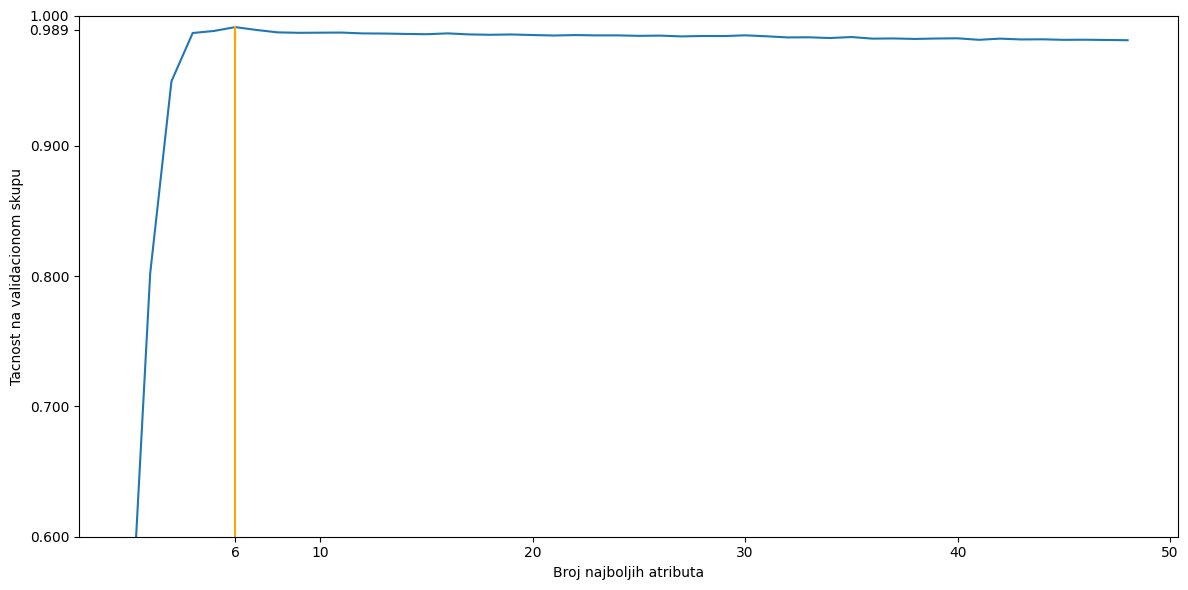

In [84]:
x = np.array([i for i in range(1, 49)])
y = np.array(rfeCV.cv_results_['mean_test_score'])

x1 = np.array([rfeCV.n_features_ for i in range(1, 49)])
y1 = y

plt.plot(x, y)
plt.plot(x1, y1, color='orange')

plt.xlabel('Broj najboljih atributa')
plt.ylabel('Tacnost na validacionom skupu')

plt.xticks(list([rfeCV.n_features_, 10, 20, 30, 40, 50]))
plt.yticks(list([0.6, 0.7, 0.8, 0.9, 1.0, rfeCV.cv_results_['mean_test_score'][rfeCV.n_features_]]))

plt.ylim([0.6, 1])

plt.rcParams["figure.figsize"] = (12,6)

plt.tight_layout()
plt.show()

In [53]:
X_train_RFE_list = []
X_test_RFE_list = []
for i in range(0, len(rfeCV.support_)):
    if rfeCV.support_[i] == True:
        #print(i)
        X_train_RFE_list.append(pd.DataFrame(X_train[:][i]))
        X_test_RFE_list.append(pd.DataFrame(X_test[:][i]))

In [54]:
X_train_RFE = pd.concat(X_train_RFE_list, axis=1)
%store X_train_RFE
train_sets["RFE"] = X_train_RFE
X_train_RFE

Stored 'X_train_RFE' (DataFrame)


,6,8,10,11,15,21
38808,0.031096,0.031128,-0.000984,-0.001008,0.001216,1.64740
45177,-0.001319,-0.000822,-0.037934,-0.037913,0.002192,1.38860
11388,0.011977,0.011973,0.023602,0.023609,0.000797,1.70430
8146,-0.021051,-0.021197,-0.024664,-0.024874,0.002165,1.29950
31626,0.007519,0.007984,-0.019039,-0.019123,0.002883,2.25020
...,...,...,...,...,...,...
54072,-0.106910,-0.106880,-0.201280,-0.201240,0.000815,1.82260
26989,0.019945,0.019935,-0.028276,-0.028241,0.000774,0.98794
32551,0.063556,0.063555,0.109600,0.109610,0.000797,1.67410
22294,0.023736,0.023695,0.023612,0.023251,0.001159,1.17170


In [55]:
X_test_RFE = pd.concat(X_test_RFE_list, axis=1)
%store X_test_RFE
test_sets["RFE"] = X_test_RFE
X_test_RFE

Stored 'X_test_RFE' (DataFrame)


,6,8,10,11,15,21
26270,0.032497,0.032322,0.020463,0.020208,0.002904,2.2516
41358,0.031371,0.031316,0.025450,0.025456,0.002683,1.8572
36492,0.051609,0.051899,0.094147,0.094262,0.002852,2.2055
32149,0.050070,0.050064,0.113380,0.113390,0.000754,0.8738
17274,0.015774,0.015906,0.047948,0.047983,0.001101,1.1773
...,...,...,...,...,...,...
20279,0.008598,0.008377,0.062177,0.062358,0.002623,1.8830
54473,-0.075163,-0.075068,-0.190010,-0.190030,0.001154,1.2294
6917,-0.021552,-0.021698,-0.022158,-0.022254,0.001256,1.6697
4062,0.020217,0.020229,-0.044820,-0.045272,0.002561,1.7800


In [56]:
%store train_sets
%store test_sets

Stored 'train_sets' (dict)
Stored 'test_sets' (dict)


In [57]:
#KNN additional preprocessing

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
X_train_KNN, X_val_KNN, y_train_KNN, y_val_KNN = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)

In [61]:
normalScaler_KNN = MinMaxScaler()

In [62]:
normalScaler_KNN.fit(X_train_KNN)

MinMaxScaler()

In [63]:
X_train_normalized_KNN = normalScaler_KNN.transform(X_train_KNN)

In [64]:
X_val_normalized_KNN = normalScaler_KNN.transform(X_val_KNN)

In [65]:
standardScaler_KNN = StandardScaler()

In [66]:
standardScaler_KNN.fit(X_train_KNN)

StandardScaler()

In [67]:
X_train_standardized_KNN = standardScaler_KNN.transform(X_train_KNN)

In [68]:
X_val_standardized_KNN = standardScaler_KNN.transform(X_val_KNN)

In [69]:
featureScalings_KNN_train = {'X_train': X_train_KNN, 'X_train_normalized': X_train_normalized_KNN,
                             'X_train_standardized': X_train_standardized_KNN}

In [70]:
featureScalings_KNN_val = {'X_train': X_val_KNN, 'X_train_normalized': X_val_normalized_KNN,
                             'X_train_standardized': X_val_standardized_KNN}

In [71]:
model_KNN = KNeighborsClassifier()

In [72]:
val_score_KNN = []
for X_train_scaling in featureScalings_KNN_train:
    print("   " + X_train_scaling, end = ": ")
    model_KNN.fit(featureScalings_KNN_train[X_train_scaling], y_train_KNN)
    y_val_KNN_predicted = model_KNN.predict(featureScalings_KNN_val[X_train_scaling])
    val_score = accuracy_score(y_val_KNN, y_val_KNN_predicted)
    val_score_KNN.append(val_score)
    print(val_score)

   X_train: 0.12173382173382173
   X_train_normalized: 0.9822954822954822
   X_train_standardized: 0.7964590964590964


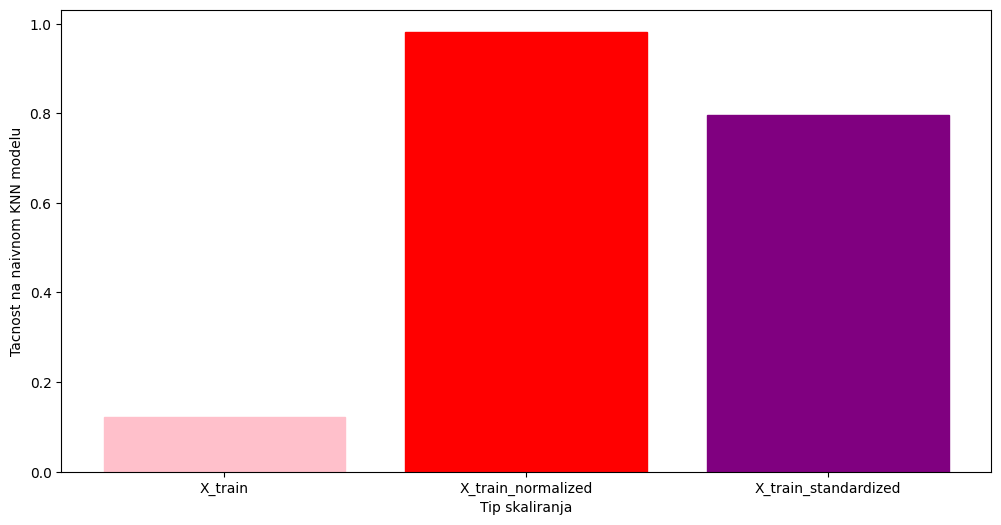

In [85]:
barlist = plt.bar(featureScalings.keys(), val_score_KNN)
barlist[0].set_color('pink')
barlist[1].set_color('red')
barlist[2].set_color('purple')

plt.xlabel('Tip skaliranja')
plt.ylabel('Tacnost na naivnom KNN modelu')

plt.show()

In [74]:
#normalizujemo RFE(obican i PCA skup vec postoje normalizovani)

In [75]:
train_sets_KNN = {"basic" : X_train_normalized, "PCA" : X_train_PCA}
test_sets_KNN = {"basic" : X_test_normalized, "PCA" : X_test_PCA}

In [76]:
normalScaler.fit(X_train_RFE)

MinMaxScaler()

In [77]:
X_train_RFE_KNN = pd.DataFrame(normalScaler.transform(X_train_RFE))
train_sets_KNN['RFE'] = X_train_RFE_KNN

In [78]:
X_test_RFE_KNN = pd.DataFrame(normalScaler.transform(X_test_RFE))
test_sets_KNN['RFE'] = X_test_RFE_KNN

In [79]:
%store train_sets_KNN
%store test_sets_KNN

Stored 'train_sets_KNN' (dict)
Stored 'test_sets_KNN' (dict)
